<a href="https://colab.research.google.com/github/B21-CAP0075/Dementia-Classification/blob/development/Dementia_classification_beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [34]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
! pip install --upgrade --force-reinstall --no-deps kaggle
! mkdir /root/.kaggle/
! cp "/content/drive/My Drive/Machine Learning/kaggle.json" /root/.kaggle/
! chmod 600 /root/.kaggle/kaggle.json

Processing /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303/kaggle-1.5.12-cp37-none-any.whl
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12
mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [36]:
! kaggle datasets download -d jboysen/mri-and-alzheimers

mri-and-alzheimers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [37]:
zip_ref = zipfile.ZipFile('mri-and-alzheimers.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [38]:
df_cross = pd.read_csv('oasis_cross-sectional.csv')
df_cross.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [45]:
df_cross.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


In [39]:
df_cross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


In [43]:
for column in df_cross.columns:
    if df_cross[column].dtypes == "object":
        print("Column name: {}".format(column))
        print("Number of unique entry: {}".format(len(df_cross[column].unique())))
        print("Unique entry: {}".format(df_cross[column].unique()))
        print()

Column name: ID
Number of unique entry: 436
Unique entry: ['OAS1_0001_MR1' 'OAS1_0002_MR1' 'OAS1_0003_MR1' 'OAS1_0004_MR1'
 'OAS1_0005_MR1' 'OAS1_0006_MR1' 'OAS1_0007_MR1' 'OAS1_0009_MR1'
 'OAS1_0010_MR1' 'OAS1_0011_MR1' 'OAS1_0012_MR1' 'OAS1_0013_MR1'
 'OAS1_0014_MR1' 'OAS1_0015_MR1' 'OAS1_0016_MR1' 'OAS1_0017_MR1'
 'OAS1_0018_MR1' 'OAS1_0019_MR1' 'OAS1_0020_MR1' 'OAS1_0021_MR1'
 'OAS1_0022_MR1' 'OAS1_0023_MR1' 'OAS1_0025_MR1' 'OAS1_0026_MR1'
 'OAS1_0027_MR1' 'OAS1_0028_MR1' 'OAS1_0029_MR1' 'OAS1_0030_MR1'
 'OAS1_0031_MR1' 'OAS1_0032_MR1' 'OAS1_0033_MR1' 'OAS1_0034_MR1'
 'OAS1_0035_MR1' 'OAS1_0037_MR1' 'OAS1_0038_MR1' 'OAS1_0039_MR1'
 'OAS1_0040_MR1' 'OAS1_0041_MR1' 'OAS1_0042_MR1' 'OAS1_0043_MR1'
 'OAS1_0044_MR1' 'OAS1_0045_MR1' 'OAS1_0046_MR1' 'OAS1_0047_MR1'
 'OAS1_0049_MR1' 'OAS1_0050_MR1' 'OAS1_0051_MR1' 'OAS1_0052_MR1'
 'OAS1_0053_MR1' 'OAS1_0054_MR1' 'OAS1_0055_MR1' 'OAS1_0056_MR1'
 'OAS1_0057_MR1' 'OAS1_0058_MR1' 'OAS1_0059_MR1' 'OAS1_0060_MR1'
 'OAS1_0061_MR1' 'OAS1_0062_MR1'

In [40]:
df_long = pd.read_csv('oasis_longitudinal.csv')
df_long.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [41]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [44]:
df_long.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [42]:
for column in df_long.columns:
    if df_long[column].dtypes == "object":
        print("Column name: {}".format(column))
        print("Number of unique entry: {}".format(len(df_long[column].unique())))
        print("Unique entry: {}".format(df_long[column].unique()))
        print()

Column name: Subject ID
Number of unique entry: 150
Unique entry: ['OAS2_0001' 'OAS2_0002' 'OAS2_0004' 'OAS2_0005' 'OAS2_0007' 'OAS2_0008'
 'OAS2_0009' 'OAS2_0010' 'OAS2_0012' 'OAS2_0013' 'OAS2_0014' 'OAS2_0016'
 'OAS2_0017' 'OAS2_0018' 'OAS2_0020' 'OAS2_0021' 'OAS2_0022' 'OAS2_0023'
 'OAS2_0026' 'OAS2_0027' 'OAS2_0028' 'OAS2_0029' 'OAS2_0030' 'OAS2_0031'
 'OAS2_0032' 'OAS2_0034' 'OAS2_0035' 'OAS2_0036' 'OAS2_0037' 'OAS2_0039'
 'OAS2_0040' 'OAS2_0041' 'OAS2_0042' 'OAS2_0043' 'OAS2_0044' 'OAS2_0045'
 'OAS2_0046' 'OAS2_0047' 'OAS2_0048' 'OAS2_0049' 'OAS2_0050' 'OAS2_0051'
 'OAS2_0052' 'OAS2_0053' 'OAS2_0054' 'OAS2_0055' 'OAS2_0056' 'OAS2_0057'
 'OAS2_0058' 'OAS2_0060' 'OAS2_0061' 'OAS2_0062' 'OAS2_0063' 'OAS2_0064'
 'OAS2_0066' 'OAS2_0067' 'OAS2_0068' 'OAS2_0069' 'OAS2_0070' 'OAS2_0071'
 'OAS2_0073' 'OAS2_0075' 'OAS2_0076' 'OAS2_0077' 'OAS2_0078' 'OAS2_0079'
 'OAS2_0080' 'OAS2_0081' 'OAS2_0085' 'OAS2_0086' 'OAS2_0087' 'OAS2_0088'
 'OAS2_0089' 'OAS2_0090' 'OAS2_0091' 'OAS2_0092' 'OAS2_009

In [8]:
df_cross = df_cross.drop(columns=['ID', 'Delay', 'Hand', 'eTIV', 'nWBV', 'ASF'])
df_cross.columns = ['M/F', 'Age',	'EDUC',	'SES',	'MMSE',	'CDR']
df_cross.head()

,M/F,Age,EDUC,SES,MMSE,CDR
0,F,74,2.0,3.0,29.0,0.0
1,F,55,4.0,1.0,29.0,0.0
2,F,73,4.0,3.0,27.0,0.5
3,M,28,NaN,NaN,NaN,NaN
4,M,18,NaN,NaN,NaN,NaN


In [9]:
df_long = df_long.drop(columns=['Subject ID', 'MRI ID', 'Visit', 'MR Delay', 'Hand', 'eTIV', 'nWBV', 'ASF', 'Group'])
df_long.head()

,M/F,Age,EDUC,SES,MMSE,CDR
0,M,87,14,2.0,27.0,0.0
1,M,88,14,2.0,30.0,0.0
2,M,75,12,NaN,23.0,0.5
3,M,76,12,NaN,28.0,0.5
4,M,80,12,NaN,22.0,0.5


In [10]:
df = pd.concat([df_cross, df_long])
df = df[df['CDR'].notna()]
df = df[df['SES'].notna()]
df = df[df['MMSE'].notna()]
df

,M/F,Age,EDUC,SES,MMSE,CDR
0,F,74,2.0,3.0,29.0,0.0
1,F,55,4.0,1.0,29.0,0.0
2,F,73,4.0,3.0,27.0,0.5
8,M,74,5.0,2.0,30.0,0.0
9,F,52,3.0,2.0,30.0,0.0
...,...,...,...,...,...,...
368,M,82,16.0,1.0,28.0,0.5
369,M,86,16.0,1.0,26.0,0.5
370,F,61,13.0,2.0,30.0,0.0
371,F,63,13.0,2.0,30.0,0.0


In [11]:
df['CDR'] = df['CDR'].replace(
    [0.0, 0.5, 1.0, 2.0],
    [0, 0, 1, 1]
)

print(df['CDR'].unique())

[0. 1.]


In [12]:
df_temp = df[df['CDR'] == 0]
df_temp = df_temp[:200]
new_df = df_temp.append(df[df['CDR'] == 1])

df = new_df
print(len(df))

264


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


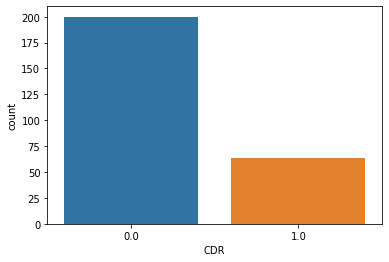

In [13]:
sns.countplot(df['CDR'])

In [14]:
df.isnull().sum()

M/F     0
Age     0
EDUC    0
SES     0
MMSE    0
CDR     0
dtype: int64

In [15]:
gender = pd.get_dummies(df['M/F'])

df = df.drop(columns=['M/F'])
df = pd.concat([df, gender], axis=1)
df

,Age,EDUC,SES,MMSE,CDR,F,M
0,74,2.0,3.0,29.0,0.0,1,0
1,55,4.0,1.0,29.0,0.0,1,0
2,73,4.0,3.0,27.0,0.0,1,0
8,74,5.0,2.0,30.0,0.0,0,1
9,52,3.0,2.0,30.0,0.0,1,0
...,...,...,...,...,...,...,...
329,77,20.0,1.0,23.0,1.0,0,1
330,79,20.0,1.0,25.0,1.0,0,1
331,78,12.0,3.0,23.0,1.0,0,1
332,80,12.0,3.0,17.0,1.0,0,1


In [16]:
df_normal = df[df['CDR'] == 0]
df_dementia = df[df['CDR'] == 1]

print(df_normal.tail())
print(df_dementia.tail())
print()
print(len(df_normal))
print(len(df_dementia))

    Age  EDUC  SES  MMSE  CDR  F  M
8    83  12.0  4.0  29.0  0.0  0  1
9    85  12.0  4.0  30.0  0.0  0  1
13   93  14.0  2.0  30.0  0.0  1  0
14   95  14.0  2.0  29.0  0.0  1  0
15   68  12.0  2.0  27.0  0.0  0  1
     Age  EDUC  SES  MMSE  CDR  F  M
329   77  20.0  1.0  23.0  1.0  0  1
330   79  20.0  1.0  25.0  1.0  0  1
331   78  12.0  3.0  23.0  1.0  0  1
332   80  12.0  3.0  17.0  1.0  0  1
366   73  16.0  3.0  21.0  1.0  1  0

200
64


In [17]:
x_normal = df_normal[['Age', 'EDUC', 'SES', 'MMSE', 'F',	'M']].values
y_normal = df_normal[['CDR']].values

x_dementia = df_dementia[['Age', 'EDUC', 'SES', 'MMSE', 'F',	'M']].values
y_dementia = df_dementia[['CDR']].values

In [18]:
split = 0.2
x_train_normal, x_test_normal, y_train_normal, y_test_normal = train_test_split(x_normal, y_normal, test_size=split, random_state=42)
x_train_dementia, x_test_dementia, y_train_dementia, y_test_dementia = train_test_split(x_dementia, y_dementia, test_size=split, random_state=42)

print(len(x_test_normal))
print(len(x_test_dementia))

40
13


In [19]:
x_train = (x_train_normal, x_train_dementia)
x_test = (x_test_normal, x_test_dementia)
y_train = (y_train_normal, y_train_dementia)
y_test = (y_test_normal, y_test_dementia)

In [20]:
x_train, x_test, y_train, y_test = np.concatenate(x_train), np.concatenate(x_test), np.concatenate(y_train), np.concatenate(y_test)

In [21]:
print(x_train.shape)
print(x_test.shape)

(211, 6)
(53, 6)


In [22]:
scaler = MinMaxScaler().fit(np.concatenate((x_train, x_test)))
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [23]:
# save feature numpy as scaler at backend
np.savetxt("scaler.csv", np.concatenate((x_train, x_test)), delimiter=",")

In [24]:
model = tf.keras.Sequential([
      tf.keras.layers.Dense(16, activation='relu', input_shape=[6]),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(8, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(1, activation='sigmoid')    
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                112       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [25]:
class StopTraining(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    accuracy = 0.90
    loss = 0.3
    if(logs.get('accuracy') >= accuracy and logs.get('val_accuracy') >= accuracy and
       logs.get('loss') <= loss and logs.get('val_loss') <= loss):
      print('\nSudah mencapai akurasi {}%, proses training berhenti'.format(accuracy*100))
      self.model.stop_training = True

mc = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
es = EarlyStopping(monitor='val_loss', patience=100)
st = StopTraining()

In [26]:
history = model.fit(x_train_scaled, y_train, epochs=500, validation_data=(x_test_scaled, y_test), callbacks=[mc, es, st], verbose=2)

Epoch 1/500
7/7 - 4s - loss: 0.6497 - accuracy: 0.7346 - val_loss: 0.6461 - val_accuracy: 0.7547
Epoch 2/500
7/7 - 0s - loss: 0.6509 - accuracy: 0.7488 - val_loss: 0.6317 - val_accuracy: 0.7547
Epoch 3/500
7/7 - 0s - loss: 0.6280 - accuracy: 0.7583 - val_loss: 0.6195 - val_accuracy: 0.7547
Epoch 4/500
7/7 - 0s - loss: 0.6200 - accuracy: 0.7583 - val_loss: 0.6058 - val_accuracy: 0.7547
Epoch 5/500
7/7 - 0s - loss: 0.6173 - accuracy: 0.7630 - val_loss: 0.5937 - val_accuracy: 0.7547
Epoch 6/500
7/7 - 0s - loss: 0.6144 - accuracy: 0.7583 - val_loss: 0.5839 - val_accuracy: 0.7547
Epoch 7/500
7/7 - 0s - loss: 0.5957 - accuracy: 0.7583 - val_loss: 0.5745 - val_accuracy: 0.7547
Epoch 8/500
7/7 - 0s - loss: 0.5713 - accuracy: 0.7583 - val_loss: 0.5643 - val_accuracy: 0.7547
Epoch 9/500
7/7 - 0s - loss: 0.5731 - accuracy: 0.7536 - val_loss: 0.5547 - val_accuracy: 0.7547
Epoch 10/500
7/7 - 0s - loss: 0.5625 - accuracy: 0.7583 - val_loss: 0.5459 - val_accuracy: 0.7547
Epoch 11/500
7/7 - 0s - loss:

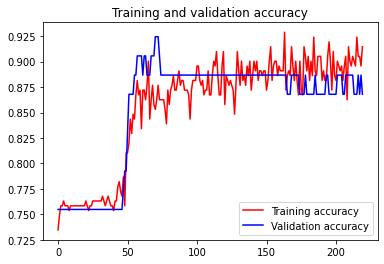

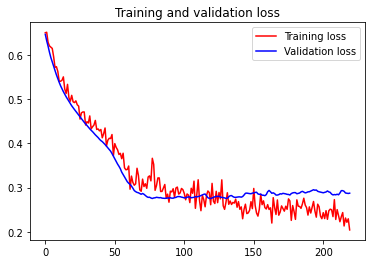

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

In [28]:
saved_model = load_model('best_model.h5')

loss, acc = saved_model.evaluate(x_test_scaled, y_test)
print("Accuracy: ", acc)
print("Loss: ", loss)

2/2 [==============================] - 0s 6ms/step - loss: 0.2753 - accuracy: 0.8868
Accuracy:  0.8867924809455872
Loss:  0.27534911036491394


In [29]:
normal = [[83,  12.0,  4.0,  29.0,  0,  1],
          [85,  12.0,  4.0,  30.0,  0,  1],
          [70,  14.0,  2.0,  30.0,  1,  0],
          [68,  12.0,  2.0,  27.0,  0,  1]]

dementia = [[77,  20.0,  1.0,  23.0,  0,  1],
            [79,  20.0,  1.0,  25.0,  0,  1],
            [80,  12.0,  3.0,  17.0,  0,  1],
            [73,  16.0,  3.0,  21.0,  1,  0]] 

In [30]:
for row in normal:
  classes = model.predict(scaler.transform([row]))

  print(row)
  print(classes)
  if classes[0] < 0.5:
    print("Normal")
  else:
    print("Dementia")
  
  print()

[83, 12.0, 4.0, 29.0, 0, 1]
[[0.1133781]]
Normal

[85, 12.0, 4.0, 30.0, 0, 1]
[[0.072893]]
Normal

[70, 14.0, 2.0, 30.0, 1, 0]
[[0.39548182]]
Normal

[68, 12.0, 2.0, 27.0, 0, 1]
[[0.30421117]]
Normal



In [31]:
for row in dementia:
  classes = model.predict(scaler.transform([row]))

  print(row)
  print(classes)
  if classes[0] < 0.5:
    print("Normal")
  else:
    print("Dementia")
  
  print()

[77, 20.0, 1.0, 23.0, 0, 1]
[[0.9281975]]
Dementia

[79, 20.0, 1.0, 25.0, 0, 1]
[[0.90718096]]
Dementia

[80, 12.0, 3.0, 17.0, 0, 1]
[[0.92679924]]
Dementia

[73, 16.0, 3.0, 21.0, 1, 0]
[[0.8966534]]
Dementia

